In [15]:
from process_data import PreProcessData, PostProcessData
from model import Forecast, FitPredict, Evaluation

In [16]:
train = PreProcessData.train
test = PreProcessData.test
send = PreProcessData.sample_submission

In [17]:
preprocessor = PreProcessData(train, test)

In [33]:
dic = preprocessor.clean_dic

In [39]:
for train, test in dic.values():
    print(train)

                id country              store            product  num_sold
date                                                                      
2010-01-01       0  Canada  Discount Stickers  Holographic Goose       0.0
2010-01-02      90  Canada  Discount Stickers  Holographic Goose       0.0
2010-01-03     180  Canada  Discount Stickers  Holographic Goose       0.0
2010-01-04     270  Canada  Discount Stickers  Holographic Goose       0.0
2010-01-05     360  Canada  Discount Stickers  Holographic Goose       0.0
...            ...     ...                ...                ...       ...
2016-12-27  229680  Canada  Discount Stickers  Holographic Goose       0.0
2016-12-28  229770  Canada  Discount Stickers  Holographic Goose       0.0
2016-12-29  229860  Canada  Discount Stickers  Holographic Goose       0.0
2016-12-30  229950  Canada  Discount Stickers  Holographic Goose       0.0
2016-12-31  230040  Canada  Discount Stickers  Holographic Goose       0.0

[2557 rows x 5 columns]


In [19]:
train_index_df = preprocessor.set_time_index(train)
test_index_df = preprocessor.set_time_index(test)

In [20]:
test_index_df

,id,country,store,product
date,,,,
2017-01-01,230130,Canada,Discount Stickers,Holographic Goose
2017-01-01,230131,Canada,Discount Stickers,Kaggle
2017-01-01,230132,Canada,Discount Stickers,Kaggle Tiers
2017-01-01,230133,Canada,Discount Stickers,Kerneler
2017-01-01,230134,Canada,Discount Stickers,Kerneler Dark Mode
...,...,...,...,...
2019-12-31,328675,Singapore,Premium Sticker Mart,Holographic Goose
2019-12-31,328676,Singapore,Premium Sticker Mart,Kaggle
2019-12-31,328677,Singapore,Premium Sticker Mart,Kaggle Tiers


In [21]:
multi_dic = preprocessor.make_multiseries_dictionary(train_index_df, test_index_df)

In [22]:
counter = 0
for el in multi_dic.values():
    counter += 1
    if type(el) == tuple:
        
        print(type(el))
counter

90

In [23]:
multi_dic[('Canada',
  'Discount Stickers',
  'Holographic Goose')]

[                id country              store            product  num_sold
 date                                                                      
 2010-01-01       0  Canada  Discount Stickers  Holographic Goose       NaN
 2010-01-02      90  Canada  Discount Stickers  Holographic Goose       NaN
 2010-01-03     180  Canada  Discount Stickers  Holographic Goose       NaN
 2010-01-04     270  Canada  Discount Stickers  Holographic Goose       NaN
 2010-01-05     360  Canada  Discount Stickers  Holographic Goose       NaN
 ...            ...     ...                ...                ...       ...
 2016-12-27  229680  Canada  Discount Stickers  Holographic Goose       NaN
 2016-12-28  229770  Canada  Discount Stickers  Holographic Goose       NaN
 2016-12-29  229860  Canada  Discount Stickers  Holographic Goose       NaN
 2016-12-30  229950  Canada  Discount Stickers  Holographic Goose       NaN
 2016-12-31  230040  Canada  Discount Stickers  Holographic Goose       NaN
 
 [2557 row

In [24]:
for key in multi_dic.keys():
        multi_dic[key][0] = multi_dic[key][0].asfreq('D')
        multi_dic[key][0] = multi_dic[key][0].sort_index()
        multi_dic[key][1] = multi_dic[key][1].asfreq('D')
        multi_dic[key][1] = multi_dic[key][1].sort_index()

In [25]:
clean_dic_sep_func = preprocessor.handle_nans(multi_dic)

In [26]:
multi_dic[('Canada',
  'Discount Stickers',
  'Holographic Goose')]

[                id country              store            product  num_sold
 date                                                                      
 2010-01-01       0  Canada  Discount Stickers  Holographic Goose       0.0
 2010-01-02      90  Canada  Discount Stickers  Holographic Goose       0.0
 2010-01-03     180  Canada  Discount Stickers  Holographic Goose       0.0
 2010-01-04     270  Canada  Discount Stickers  Holographic Goose       0.0
 2010-01-05     360  Canada  Discount Stickers  Holographic Goose       0.0
 ...            ...     ...                ...                ...       ...
 2016-12-27  229680  Canada  Discount Stickers  Holographic Goose       0.0
 2016-12-28  229770  Canada  Discount Stickers  Holographic Goose       0.0
 2016-12-29  229860  Canada  Discount Stickers  Holographic Goose       0.0
 2016-12-30  229950  Canada  Discount Stickers  Holographic Goose       0.0
 2016-12-31  230040  Canada  Discount Stickers  Holographic Goose       0.0
 
 [2557 row

In [30]:
len(clean_dic_sep_func) == len(preprocessor.clean_dic)

True

In [32]:
for lst in preprocessor.clean_dic.values():
    print(type(lst))

<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'li

In [27]:
len(multi_dic)

90

In [28]:
stop

NameError: name 'stop' is not defined

In [10]:
checked_multi_dic = preprocessor.check_index_dataframes(multi_dic)

KeyError: 0

In [ ]:

        checked_multi_dic = self.check_index_dataframes(multi_dic)
        clean_dic = self.handle_nans(checked_multi_dic)
        return clean_dic

In [3]:
train_processor = PreProcessData(train)
post_process = PostProcessData()
fit_predict = FitPredict()
evaluator = Evaluation()

In [4]:
post_process.verify_index(train_processor.clean_dic)

Number of dataframes with uncomplete index:  0


In [5]:
example_df = train_processor.clean_dic['Canada',
  'Discount Stickers',
  'Kaggle']

In [6]:
example_train, example_test = post_process.train_test_split(example_df, 562)

Train dates : 2010-01-01 00:00:00 --- 2015-06-18 00:00:00  (n=1995)
Test dates  : 2015-06-19 00:00:00 --- 2016-12-31 00:00:00  (n=562)


In [7]:
forecast = Forecast()

In [8]:
stop

NameError: name 'stop' is not defined

In [9]:
forecaster = forecast.create_lgbm_regressor_forecaster(562)

In [11]:
forecaster

=================== 
ForecasterRecursive 
=================== 
Regressor: LGBMRegressor 
Lags: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252
 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270
 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288
 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305 306
 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323 324
 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341 342
 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359 360
 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377 378
 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394 395 396
 397 398 399 400 401 402 403 404 405 406 407 408 409 410 411 412 413 414
 415 416 417 418 419 420 421 422 423 424 425 426 427 428 429 430 431 432
 433 434 435 436 437 438 439 440 441 442 443 444 445 446 447 448 449 450
 451 452 453 454 455 456 457 458 459 460 461 462 463 464 465 466 467 468
 469 470 471 472 473 474 475 476 477 478 479 480 481 482 483 484 485 486
 487 488 489 490 491 492 493 494 495 496 497 498 499 500 501 502 503 504
 505 506 507 508 509 510 511 512 513 514 515 516 517 518 519 520 521 522
 523 524 525 526 527 528 529 530 531 532 533 534 535 536 537 538 539 540
 541 542 543 544 545 546 547 548 549 550 551 552 553 554 555 556 557 558
 559 560 561 562] 
Window features: None 
Window size: 562 
Exogenous included: False 
Exogenous names: None 
Transformer for y: None 
Transformer for exog: None 
Weight function included: False 
Differentiation order: None 
Training range: None 
Training index type: None 
Training index frequency: None 
Regressor parameters: 
    {'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0,
    'importance_type': 'split', 'learning_rate': 0.1, 'max_depth': -1,
    'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0,
    'n_estimators': 100, 'n_jobs': None, 'num_leaves': 31, 'objective': None,
    'random_state': 123, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'subsample': 1.0,
    'subsample_for_bin': 200000, 'subsample_freq': 0} 
fit_kwargs: {} 
Creation date: 2025-01-20 20:40:35 
Last fit date: None 
Skforecast version: 0.14.0 
Python version: 3.12.5 
Forecaster id: None

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009889 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 143029
[LightGBM] [Info] Number of data points in the train set: 1433, number of used features: 562
[LightGBM] [Info] Start training from score 745.400558


(54.3982901919151, 0.06920126406463188)

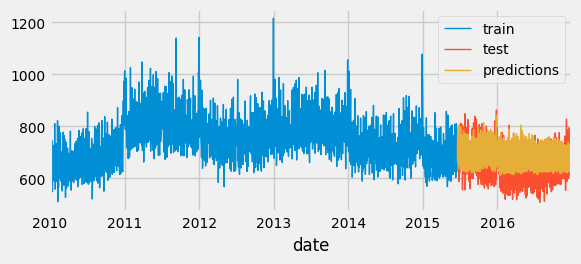

In [10]:
fit_predict.fit_forecaster(forecaster, example_train, 'num_sold')
predictions = fit_predict.get_predictions(forecaster, 562)
evaluator.plot_predictions_versus_test_data(example_train, example_test, 'num_sold', predictions)
evaluator.test_error(example_test, 'num_sold', predictions)

In [15]:
forecast.hyperparameter_grid_search_lgbm(forecaster, example_train, 'num_sold', 562)

lags grid:   0%|          | 0/1 [00:00<?, ?it/s]

params grid:   0%|          | 0/10 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004868 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 70575
[LightGBM] [Info] Number of data points in the train set: 435, number of used features: 562
[LightGBM] [Info] Start training from score 763.160920
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

=================== 
ForecasterRecursive 
=================== 
Regressor: LGBMRegressor 
Lags: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252
 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270
 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288
 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305 306
 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323 324
 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341 342
 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359 360
 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377 378
 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394 395 396
 397 398 399 400 401 402 403 404 405 406 407 408 409 410 411 412 413 414
 415 416 417 418 419 420 421 422 423 424 425 426 427 428 429 430 431 432
 433 434 435 436 437 438 439 440 441 442 443 444 445 446 447 448 449 450
 451 452 453 454 455 456 457 458 459 460 461 462 463 464 465 466 467 468
 469 470 471 472 473 474 475 476 477 478 479 480 481 482 483 484 485 486
 487 488 489 490 491 492 493 494 495 496 497 498 499 500 501 502 503 504
 505 506 507 508 509 510 511 512 513 514 515 516 517 518 519 520 521 522
 523 524 525 526 527 528 529 530 531 532 533 534 535 536 537 538 539 540
 541 542 543 544 545 546 547 548 549 550 551 552 553 554 555 556 557 558
 559 560 561 562] 
Window features: None 
Window size: 562 
Exogenous included: False 
Exogenous names: None 
Transformer for y: None 
Transformer for exog: None 
Weight function included: False 
Differentiation order: None 
Training range: [Timestamp('2010-01-01 00:00:00'), Timestamp('2015-06-18 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: D 
Regressor parameters: 
    {'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0,
    'importance_type': 'split', 'learning_rate': 0.1, 'max_depth': -1,
    'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0,
    'n_estimators': 100, 'n_jobs': None, 'num_leaves': 31, 'objective': None,
    'random_state': 123, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'subsample': 1.0,
    'subsample_for_bin': 200000, 'subsample_freq': 0, 'alpha': 1e-05} 
fit_kwargs: {} 
Creation date: 2025-01-21 18:25:42 
Last fit date: 2025-01-21 18:26:08 
Skforecast version: 0.14.0 
Python version: 3.12.5 
Forecaster id: None

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013009 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 143029
[LightGBM] [Info] Number of data points in the train set: 1433, number of used features: 562
[LightGBM] [Info] Start training from score 745.400558


(54.3982901919151, 0.06920126406463188)

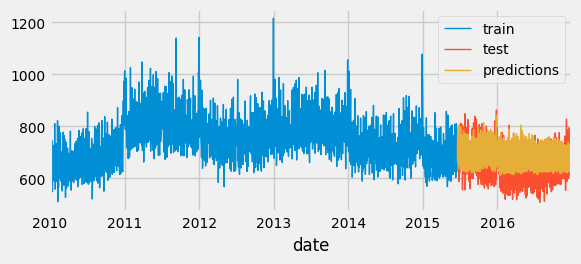

In [16]:
fit_predict.fit_forecaster(forecaster, example_train, 'num_sold')
predictions = fit_predict.get_predictions(forecaster, 562)
evaluator.plot_predictions_versus_test_data(example_train, example_test, 'num_sold', predictions)
evaluator.test_error(example_test, 'num_sold', predictions)

Forest

(75.51506520289753, 0.10195921965757589)

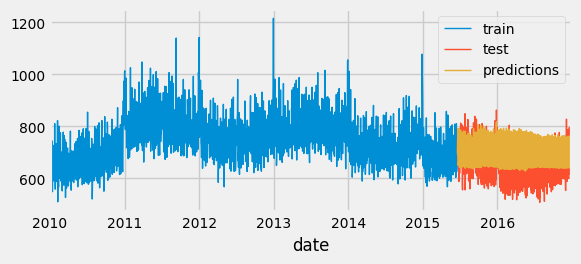

In [11]:
forecaster = forecast.create_random_forest_regresor_forecaster(562)
fit_predict.fit_forecaster(forecaster, example_train, 'num_sold')
predictions = fit_predict.get_predictions(forecaster, 562)
evaluator.plot_predictions_versus_test_data(example_train, example_test, 'num_sold', predictions)
evaluator.test_error(example_test, 'num_sold', predictions)

In [12]:
forecast.hyperparameter_grid_search_forest(forecaster, example_train, 'num_sold', 562)

lags grid:   0%|          | 0/1 [00:00<?, ?it/s]

params grid:   0%|          | 0/18 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 22

=================== 
ForecasterRecursive 
=================== 
Regressor: RandomForestRegressor 
Lags: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252
 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270
 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288
 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305 306
 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323 324
 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341 342
 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359 360
 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377 378
 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394 395 396
 397 398 399 400 401 402 403 404 405 406 407 408 409 410 411 412 413 414
 415 416 417 418 419 420 421 422 423 424 425 426 427 428 429 430 431 432
 433 434 435 436 437 438 439 440 441 442 443 444 445 446 447 448 449 450
 451 452 453 454 455 456 457 458 459 460 461 462 463 464 465 466 467 468
 469 470 471 472 473 474 475 476 477 478 479 480 481 482 483 484 485 486
 487 488 489 490 491 492 493 494 495 496 497 498 499 500 501 502 503 504
 505 506 507 508 509 510 511 512 513 514 515 516 517 518 519 520 521 522
 523 524 525 526 527 528 529 530 531 532 533 534 535 536 537 538 539 540
 541 542 543 544 545 546 547 548 549 550 551 552 553 554 555 556 557 558
 559 560 561 562] 
Window features: None 
Window size: 562 
Exogenous included: False 
Exogenous names: None 
Transformer for y: None 
Transformer for exog: None 
Weight function included: False 
Differentiation order: None 
Training range: [Timestamp('2010-01-01 00:00:00'), Timestamp('2015-06-18 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: D 
Regressor parameters: 
    {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth':
    5, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None,
    'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2,
    'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100,
    'n_jobs': None, 'oob_score': False, 'random_state': 123, 'verbose': 0,
    'warm_start': False} 
fit_kwargs: {} 
Creation date: 2025-01-21 18:29:31 
Last fit date: 2025-01-21 18:54:17 
Skforecast version: 0.14.0 
Python version: 3.12.5 
Forecaster id: None

(80.20009631640823, 0.10849601900527772)

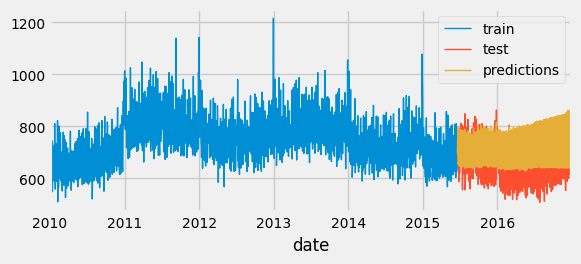

In [17]:
fit_predict.fit_forecaster(forecaster, example_train, 'num_sold')
predictions = fit_predict.get_predictions(forecaster, 562)
evaluator.plot_predictions_versus_test_data(example_train, example_test, 'num_sold', predictions)
evaluator.test_error(example_test, 'num_sold', predictions)

(115.99452380607181, 0.1705731644713025)

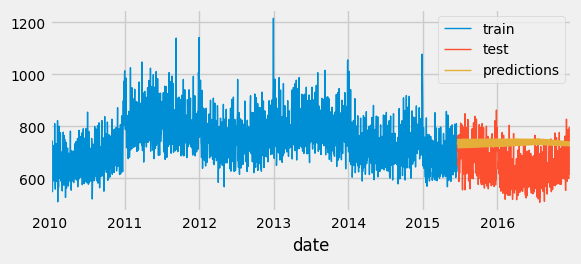

In [9]:
forecaster = forecast.create_svr_regresor_forecaster(562)
fit_predict.fit_forecaster(forecaster, example_train, 'num_sold')
predictions = fit_predict.get_predictions(forecaster, 562)
evaluator.plot_predictions_versus_test_data(example_train, example_test, 'num_sold', predictions)
evaluator.test_error(example_test, 'num_sold', predictions)

la funcion hiperparametros no sirve

In [10]:
forecast.hyperparameter_grid_search_svr(forecaster, example_train, 'num_sold', 562)

lags grid:   0%|          | 0/1 [00:00<?, ?it/s]

params grid:   0%|          | 0/64 [00:00<?, ?it/s]

KeyboardInterrupt: 

(57.93919825976579, 0.07511629402116939)

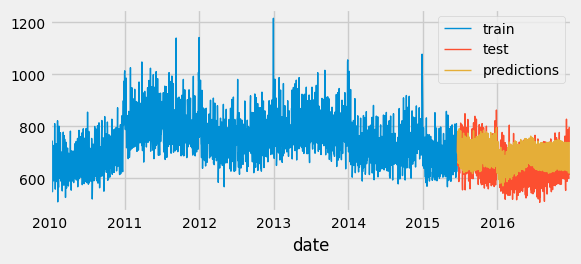

In [20]:
fit_predict.fit_forecaster(forecaster, example_train, 'num_sold')
predictions = fit_predict.get_predictions(forecaster, 562)
evaluator.plot_predictions_versus_test_data(example_train, example_test, 'num_sold', predictions)
evaluator.test_error(example_test, 'num_sold', predictions)

(119.03215368281424, 0.17472450207624374)

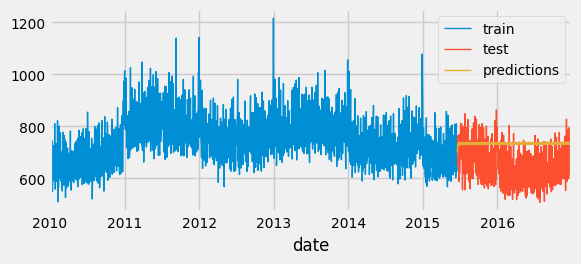

In [ ]:
forecaster = forecast.create_sarimax_forecaster()
fit_predict.fit_forecaster(forecaster, example_train, 'num_sold')
predictions = fit_predict.get_predictions(forecaster, 562)
evaluator.plot_predictions_versus_test_data(example_train, example_test, 'num_sold', predictions)
evaluator.test_error(example_test, 'num_sold', predictions)

la funcion de creación del forecaster no sirve

In [11]:
forecaster = forecast.hyperparameter_grid_search_sarimax(forecaster, example_train, 'num_sold', 562)

Number of models compared: 45.


params grid:   0%|          | 0/45 [00:00<?, ?it/s]

c:\Users\josin\anaconda3\envs\skforecast_env\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(74.23281806521068, 0.08898086720285703)

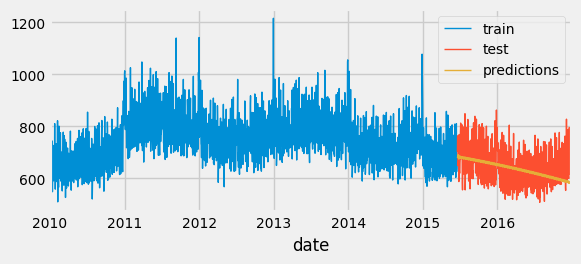

In [12]:
fit_predict.fit_forecaster(forecaster, example_train, 'num_sold')
predictions = fit_predict.get_predictions(forecaster, 562)
evaluator.plot_predictions_versus_test_data(example_train, example_test, 'num_sold', predictions)
evaluator.test_error(example_test, 'num_sold', predictions)